### Process data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        120269 non-null int64
RevolvingUtilizationOfUnsecuredLines    120269 non-null float64
age                                     120269 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    120269 non-null int64
DebtRatio                               120269 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         120269 non-null int64
NumberOfTimes90DaysLate                 120269 non-null int64
NumberRealEstateLoansOrLines            120269 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    120269 non-null int64
NumberOfDependents                      120269 non-null float64
dtypes: float64(4), int64(7)
memory usage: 16.0 MB
None


In [4]:
# Check null value
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

####  Handle missing values
Fill missing values with median.

In [4]:
# Replace missing value with median
df.MonthlyIncome = df.MonthlyIncome.fillna(df.MonthlyIncome.median())
df.NumberOfDependents = df.NumberOfDependents.fillna(df.NumberOfDependents.median())
# Check if there's any missing value left
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [26]:
X.shape, y.shape

((150000, 10), (150000,))

**Correlation matrix**

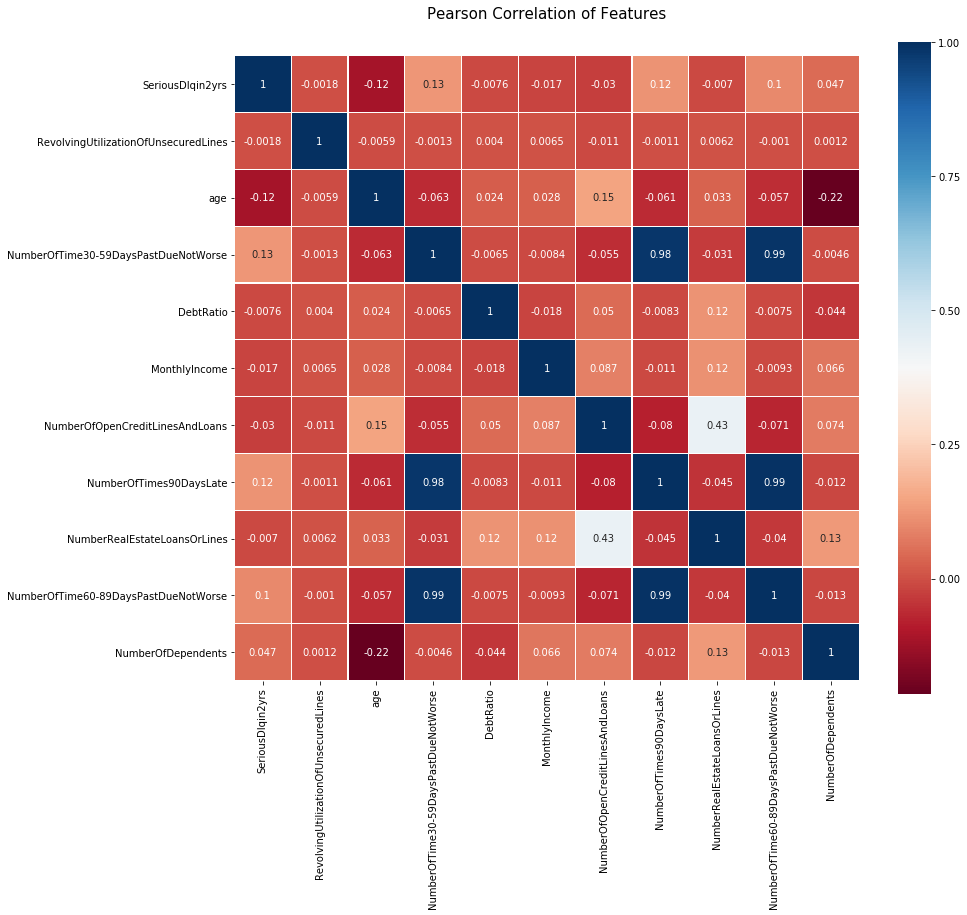

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_context("paper")
%matplotlib inline
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

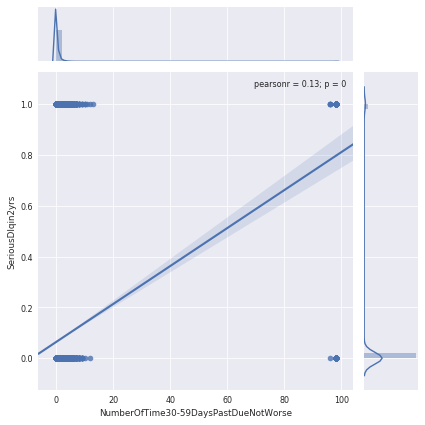

In [115]:
sns.jointplot("NumberOfTime30-59DaysPastDueNotWorse", "SeriousDlqin2yrs", 
              data=df, kind='reg');

There's significant signal of bad loan in the 30 days.

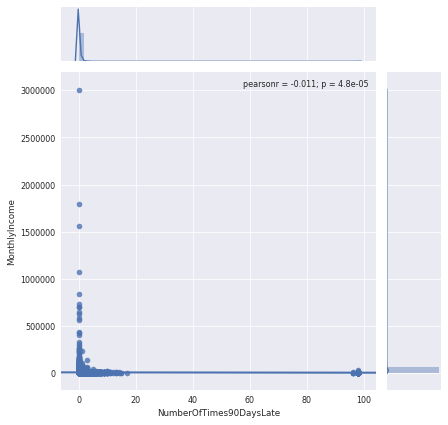

In [118]:
sns.jointplot("NumberOfTimes90DaysLate", "MonthlyIncome", 
              data=df, kind='reg');

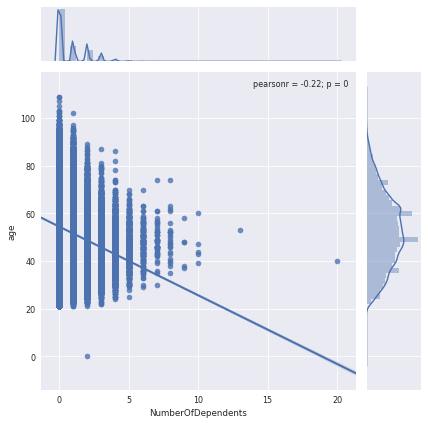

In [116]:
sns.jointplot("NumberOfDependents", "age", data=df, kind='reg');

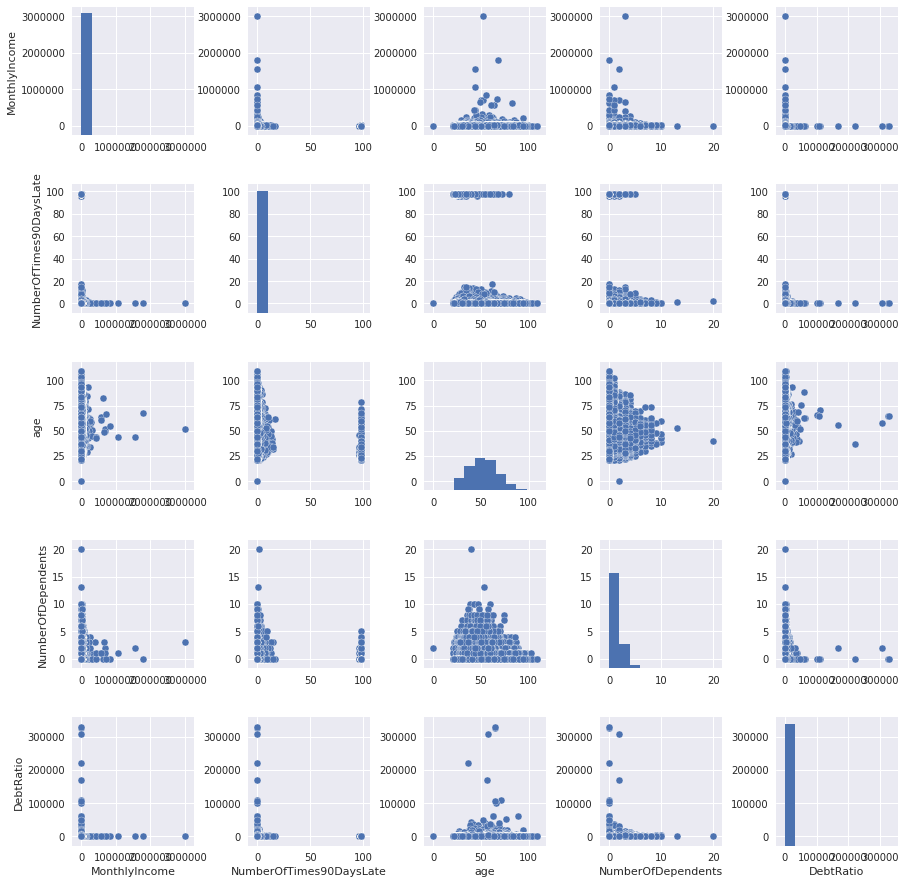

In [188]:
#scatterplot
sns.set()
cols = ['MonthlyIncome', 'NumberOfTimes90DaysLate', 
                           'age', 'NumberOfDependents', 'DebtRatio']
sns.pairplot(df[cols], size = 2.5)
plt.show();

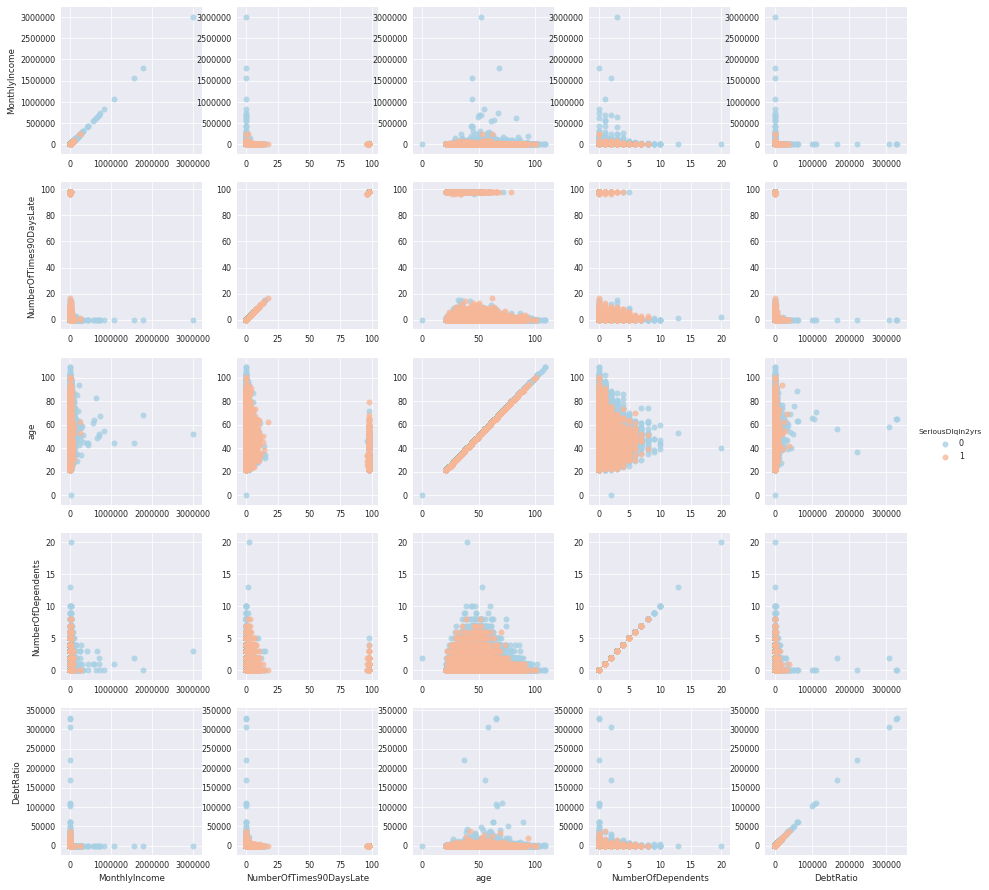

In [117]:
g = sns.PairGrid(df, vars=['MonthlyIncome', 'NumberOfTimes90DaysLate', 
                           'age', 'NumberOfDependents', 'DebtRatio'],
                 hue='SeriousDlqin2yrs', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Past due tends to be late and delinquency. 

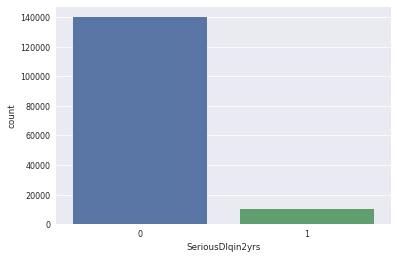

In [186]:
sns.countplot(x="SeriousDlqin2yrs", data=df);

## Modeling

In [104]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/credit_scoring/cs-training.csv')
df.head()
df = df.drop(columns=['Unnamed: 0'])

# Replace missing value with median
df.MonthlyIncome = df.MonthlyIncome.fillna(df.MonthlyIncome.median())
df.NumberOfDependents = df.NumberOfDependents.fillna(df.NumberOfDependents.median())
X = df.drop(["SeriousDlqin2yrs"],axis=1)
y = df["SeriousDlqin2yrs"]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [85]:
num_tree = 100

dt_params = {
    'max_depth':1,
    'criterion':'entropy',
    'random_state':0
}

rf_params = {
    'n_jobs': -1,
    'n_estimators': num_tree,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':num_tree,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': num_tree,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': num_tree,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [77]:
from sklearn.model_selection import cross_val_score

def bar_plot_accuracy(results):
    cv_mean = list(map(lambda x: np.mean(x), results.values()))
    cv_std = list(map(lambda x: np.var(x), results.values()))
    cv_res = pd.DataFrame({"CrossValMeans":cv_mean,
                           "CrossValerrors":cv_std,
                           "Algorithm":list(results.keys())})
    g = sns.barplot("CrossValMeans","Algorithm", data = cv_res, 
                    palette="Set3", orient = "h",**{'xerr':cv_std})
    g.set_xlabel("Mean Accuracy")
    g = g.set_title("Cross validation scores")

def print_accuracy(results):
    for name, scores in results.items():
        print("Accuracy: %0.2f%% (+/- %0.2f%%) | %20s" 
          % (100*scores.mean(), 100*scores.std() * 2, name))

def classifiers_accuracy(classifiers, 
                         classifier_results = None,
                         X_, y_, 
                         scoring='f1_micro',
                         cv=10,
                         update_clf=True):
    for clf in classifiers:
        # Only update classifers to re-fit again if this set True
        # Otherwise, keep it for comparison
        if not update_clf and classifier_results:
            if clf.__class__.__name__ not in classifier_results:
                scores = cross_val_score(clf, X_, y_, 
                                         scoring=scoring, cv=cv)
                classifier_results[clf.__class__.__name__] = scores
        else:
            scores = cross_val_score(clf, X_, y_, scoring=scoring, cv=cv)
            classifier_results[clf.__class__.__name__] = scores
            
    print_accuracy(classifier_results)
    return classifier_results    

In [61]:
# from sklearn.svm import SVC
# import sys
# sys.setrecursionlimit(1500)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

classifiers = [
    RandomForestClassifier(**rf_params),
    ExtraTreesClassifier(**et_params),
    DecisionTreeClassifier(**dt_params),
    GradientBoostingClassifier(**gb_params),
    KNeighborsClassifier(),
#     SVC(kernel="linear"),
#     SVC(kernel="rbf"),
    AdaBoostClassifier(**ada_params),
    LogisticRegression()
]

classifier_results = classifiers_accuracy(classifiers, X, y, 
                     scoring='f1_micro', cv=10)

Accuracy: 93.60% (+/- 0.14%) |   AdaBoostClassifier
Accuracy: 93.40% (+/- 0.07%) | ExtraTreesClassifier
Accuracy: 93.37% (+/- 0.16%) |   LogisticRegression
Accuracy: 93.71% (+/- 0.18%) | GradientBoostingClassifier
Accuracy: 93.64% (+/- 0.16%) | RandomForestClassifier
Accuracy: 93.22% (+/- 0.08%) | KNeighborsClassifier
Accuracy: 89.73% (+/- 0.28%) | DecisionTreeClassifier


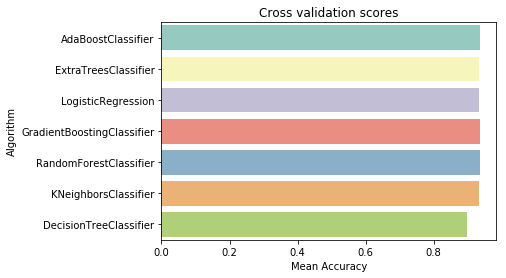

In [67]:
bar_plot_accuracy(results)

## Evaluating classifiers

**ROC curve**

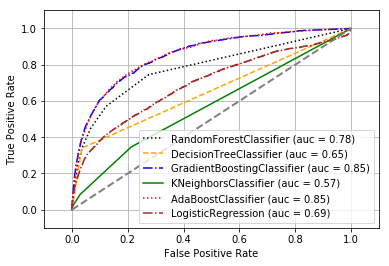

In [213]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

colors = ['black', 'orange', 'blue', 'green', 'red', 'brown']
linestyles = [':', '--', '-.', '-', ':', '-.']

classifiers = [
    RandomForestClassifier(n_estimators=10),
    DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    LogisticRegression()
]

for i, clf in enumerate(classifiers):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=colors[i],
             linestyle=linestyles[i],
             label='%s (auc = %0.2f)' % (clf.__class__.__name__, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### Hyperparameter search
We will try to find if AdaBoostClassifier has better result

In [111]:
# Adaboost
from sklearn.grid_search import GridSearchCV
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" : 100,
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.3,1]}

gsadaDTC = GridSearchCV(adaDTC, param_grid = ada_param_grid, cv=10, 
                        scoring="f1_micro", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X,y)

In [97]:
gsadaDTC.best_score_

0.9274066666666667

In [99]:
# GB
import warnings
warnings.filterwarnings("ignore")
from sklearn.grid_search import GridSearchCV

gbDTC = GradientBoostingClassifier(n_estimators=500, random_state=7)

gb_param_grid = {"learning_rate":  
                 [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]}

gsgbDTC = GridSearchCV(gbDTC, param_grid = gb_param_grid, cv=10, 
                        scoring="f1_micro", n_jobs= 4, verbose = 1)

gsgbDTC.fit(X,y)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 18.0min
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed: 28.1min finished


In [100]:
gsgbDTC.best_score_

0.9373133333333333

In [102]:
print(gsgbDTC.best_estimator_.get_params())

{'random_state': 7, 'min_impurity_split': None, 'subsample': 1.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'verbose': 0, 'learning_rate': 0.01, 'min_samples_leaf': 1, 'criterion': 'friedman_mse', 'presort': 'auto', 'init': None, 'max_features': None, 'max_depth': 3, 'warm_start': False, 'loss': 'deviance', 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'n_estimators': 500}


We can't improve much by tuning parameters. Let's try Ensemble & Stacking.

In [78]:
from vote_classifier import MajorityVoteClassifier
import copy

classifiers = [
    RandomForestClassifier(**rf_params),
    ExtraTreesClassifier(**et_params),
    GradientBoostingClassifier(**gb_params),
    KNeighborsClassifier(),
    AdaBoostClassifier(**ada_params),
    LogisticRegression()
]

# We want to keep old 'classifiers', so make a complete copy
cp1_classifiers = copy.deepcopy(classifiers)
eclf1 = MajorityVoteClassifier(classifiers=classifiers)
cp1_classifiers.append(eclf1)

classifiers_accuracy(cp1_classifiers, 
                     classifier_results = classifier_results, X, y, 
                     scoring='f1_micro', cv=10, update_clf=False)

Accuracy: 93.60% (+/- 0.14%) |   AdaBoostClassifier
Accuracy: 93.39% (+/- 0.06%) | ExtraTreesClassifier
Accuracy: 93.37% (+/- 0.16%) |   LogisticRegression
Accuracy: 93.71% (+/- 0.18%) | GradientBoostingClassifier
Accuracy: 93.60% (+/- 0.19%) | MajorityVoteClassifier
Accuracy: 93.66% (+/- 0.16%) | RandomForestClassifier
Accuracy: 93.22% (+/- 0.08%) | KNeighborsClassifier
Accuracy: 89.77% (+/- 0.34%) | DecisionTreeClassifier


{'AdaBoostClassifier': array([ 0.93513766,  0.93587094,  0.93467102,  0.93640424,  0.9356    ,
         0.93606667,  0.9369958 ,  0.93692913,  0.93586239,  0.9360624 ]),
 'DecisionTreeClassifier': array([ 0.89680688,  0.89574028,  0.89574028,  0.89934004,  0.8958    ,
         0.8984    ,  0.8975265 ,  0.89765984,  0.89819321,  0.9014601 ]),
 'ExtraTreesClassifier': array([ 0.93353776,  0.93353776,  0.93373775,  0.9334711 ,  0.93373333,
         0.93406667,  0.93412894,  0.93432896,  0.93372892,  0.93426228]),
 'GradientBoostingClassifier': array([ 0.93547097,  0.93673755,  0.93653756,  0.93780415,  0.93613333,
         0.93693333,  0.93786252,  0.93812921,  0.93666244,  0.93852924]),
 'KNeighborsClassifier': array([ 0.93233784,  0.93247117,  0.93173788,  0.93180455,  0.9322    ,
         0.93233333,  0.93259551,  0.93266218,  0.93206214,  0.93132876]),
 'LogisticRegression': array([ 0.93353776,  0.93353776,  0.93240451,  0.93300447,  0.93346667,
         0.93453333,  0.9344623 ,  0.93

**Soft voting**

In [94]:
from sklearn.ensemble import VotingClassifier

soft_classifiers = [
    RandomForestClassifier(**rf_params),
    ExtraTreesClassifier(**et_params),
    GradientBoostingClassifier(**gb_params),
    KNeighborsClassifier(),
    AdaBoostClassifier(**ada_params),
    LogisticRegression()
]

base_learners = [(clf.__class__.__name__,clf) for clf in soft_classifiers]
soft_voting_clf = VotingClassifier(estimators=base_learners, voting='soft')

cp2_classifiers = copy.deepcopy(soft_classifiers)
cp2_classifiers.append(soft_voting_clf)

classifiers_accuracy(cp2_classifiers, X_train, y_train, 
                     scoring='f1_micro', cv=10, update_clf=False)

Accuracy: 93.60% (+/- 0.14%) |   AdaBoostClassifier
Accuracy: 93.39% (+/- 0.06%) | ExtraTreesClassifier
Accuracy: 93.37% (+/- 0.16%) |   LogisticRegression
Accuracy: 93.71% (+/- 0.18%) | GradientBoostingClassifier
Accuracy: 93.60% (+/- 0.19%) | MajorityVoteClassifier
Accuracy: 93.66% (+/- 0.16%) | RandomForestClassifier
Accuracy: 93.22% (+/- 0.08%) | KNeighborsClassifier
Accuracy: 89.77% (+/- 0.34%) | DecisionTreeClassifier
Accuracy: 93.42% (+/- 0.11%) |     VotingClassifier


{'AdaBoostClassifier': array([ 0.93513766,  0.93587094,  0.93467102,  0.93640424,  0.9356    ,
         0.93606667,  0.9369958 ,  0.93692913,  0.93586239,  0.9360624 ]),
 'DecisionTreeClassifier': array([ 0.89680688,  0.89574028,  0.89574028,  0.89934004,  0.8958    ,
         0.8984    ,  0.8975265 ,  0.89765984,  0.89819321,  0.9014601 ]),
 'ExtraTreesClassifier': array([ 0.93353776,  0.93353776,  0.93373775,  0.9334711 ,  0.93373333,
         0.93406667,  0.93412894,  0.93432896,  0.93372892,  0.93426228]),
 'GradientBoostingClassifier': array([ 0.93547097,  0.93673755,  0.93653756,  0.93780415,  0.93613333,
         0.93693333,  0.93786252,  0.93812921,  0.93666244,  0.93852924]),
 'KNeighborsClassifier': array([ 0.93233784,  0.93247117,  0.93173788,  0.93180455,  0.9322    ,
         0.93233333,  0.93259551,  0.93266218,  0.93206214,  0.93132876]),
 'LogisticRegression': array([ 0.93353776,  0.93353776,  0.93240451,  0.93300447,  0.93346667,
         0.93453333,  0.9344623 ,  0.93

**Weight voting**

In [11]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=10),
    DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)
]

base_learners = [(clf.__class__.__name__,clf) for clf in classifiers]
soft_voting_clf = VotingClassifier(estimators=base_learners, voting='soft',
                                   weights=[5,6,1,1,1,1])

cp_classifiers = copy.deepcopy(classifiers)
cp_classifiers.append(soft_voting_clf)

classifiers_accuracy(cp_classifiers, X_train, y_train, 
                     scoring='roc_auc', cv=10)

Accuracy: 84.76% (+/- 0.73%) |   AdaBoostClassifier
Accuracy: 68.06% (+/- 4.45%) |   LogisticRegression
Accuracy: 55.86% (+/- 1.41%) | KNeighborsClassifier
Accuracy: 82.73% (+/- 1.25%) |     VotingClassifier
Accuracy: 64.79% (+/- 1.96%) | DecisionTreeClassifier
Accuracy: 77.01% (+/- 1.77%) | RandomForestClassifier
Accuracy: 84.66% (+/- 1.06%) | GradientBoostingClassifier


Ensembling seem doesn't improve much.

#### Stacking

In [90]:
from sklearn.model_selection import cross_val_predict
base_learners = [
    GradientBoostingClassifier(**gb_params),
    DecisionTreeClassifier(**dt_params)
]

# 1. Run CV for each base learner with training data, get a model
# 2. Generate prediction from base learner for training data

pred_results = {}
for clf in base_learners:
    predicted = cross_val_predict(clf, X_train, y_train, cv=10)
    pred_results[clf.__class__.__name__] = predicted.ravel()
    
pred_results['target'] = y_train
base_predictions_train = pd.DataFrame.from_dict(pred_results)   

In [91]:
base_predictions_train.groupby('target').count()

,DecisionTreeClassifier,GradientBoostingClassifier
target,,
0,98009,98009
1,6991,6991


In [92]:
base_predictions_train.head()

,DecisionTreeClassifier,GradientBoostingClassifier,target
94795,0,0,0
135559,0,0,0
146612,0,0,0
110273,0,0,0
131629,0,0,0


In [93]:
# 3. Predict from the base learners, using many types of meta learners
X_base = base_predictions_train.drop(["target"],axis=1)
y_base = base_predictions_train["target"]
meta_clf = LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=0)
scores = cross_val_score(meta_clf, X_base, y_base, 
                             scoring='f1_micro', cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%) | %20s" % 
          (100*scores.mean(), 100*scores.std() * 2, "StackingClassifer"))

Accuracy: 93.34% (+/- 0.01%) |    StackingClassifer


In [199]:
# 3. Predict from the base learners 
X_base = base_predictions_train.drop(["target"],axis=1)
y_base = base_predictions_train["target"]

meta_classifiers = [
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=10),
    DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)
]

classifiers_accuracy(meta_classifiers, X_train, y_train, 
                     scoring='roc_auc', cv=10)

Accuracy: 63.35% (+/- 1.45%) |   LogisticRegression
Accuracy: 60.21% (+/- 1.73%) | DecisionTreeClassifier
Accuracy: 62.91% (+/- 1.44%) | KNeighborsClassifier
Accuracy: 63.35% (+/- 1.45%) |   AdaBoostClassifier
Accuracy: 63.35% (+/- 1.45%) | GradientBoostingClassifier
Accuracy: 63.32% (+/- 1.45%) | RandomForestClassifier


### Creating NN models

##### Split data into train, validation, test

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X = df.drop(["SeriousDlqin2yrs"],axis=1)
y = df["SeriousDlqin2yrs"]

In [9]:
#divide dataset into training set, cross validation set, and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [57]:
X_train.shape, X_test.shape

((76972, 10), (24054, 10))

##### Try 1st simple model
It's important to start simple. 

We only use some of very basic techniques of Deep Learning, specifically Convolutional Neural Networks (CNNs). The reason is because we can add more complexities later. 
https://www.kaggle.com/parasjindal96/basic-deep-learning-tutorial-using-keras

In [17]:
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

In [18]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [ ]:
firstModel=getModel([10,50,1])

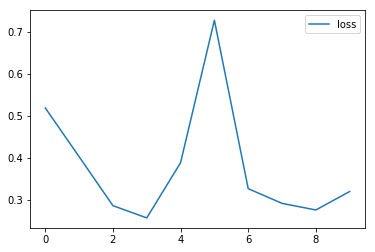

76972/76972 [==============================] - 3s 38us/step - loss: 0.3193 - acc: 0.9180 - val_loss: 0.3712 - val_acc: 0.9327


In [56]:
firstModel.fit(np.array(X_train), np.array(Y_train),validation_data=(np.array(X_val),np.array(Y_val)), epochs=10,callbacks=[plot_losses])

##### Take a step back and ask: Are we going the right direction?
This accuracy of 0.9314 gives us a sense of trust, otherwise, there's no meaning to continue using Deep Learning here! Hey, but we haven't explained what happened, **why**?

In [42]:
scores=firstModel.evaluate(np.array(X_test),np.array(Y_test))

24054/24054 [==============================] - 0s 18us/step


In [44]:
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)

Loss: 1.13779523457
Accuracy 92.9408830112


In [45]:
predY=firstModel.predict(np.array(X_test))
predY=np.round(predY).astype(int).reshape(1,-1)[0]

In [46]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY,Y_test)
tn, fn, fp, tp=confusion_matrix(predY,Y_test).ravel()
m=pd.crosstab(predY,Y_test)
print("Confusion matrix")
print(m)

Confusion matrix
SeriousDlqin2yrs      0     1
row_0                        
0                 22356  1698


In [46]:
sens=tp/(tp+fn)
spec=tn/(tn+fp)
print("Senstivity:",sens)
print("Specificity:",spec)

Senstivity: 0.0129564193168
Specificity: 0.999776346395
